## Import Module

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy as scipy_entropy
from scipy.optimize import linear_sum_assignment as linear_assignment
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 讀取檔案

In [2]:
df = pd.read_csv('sizes3.csv')
X = df.drop('class', axis=1)
y = df['class']

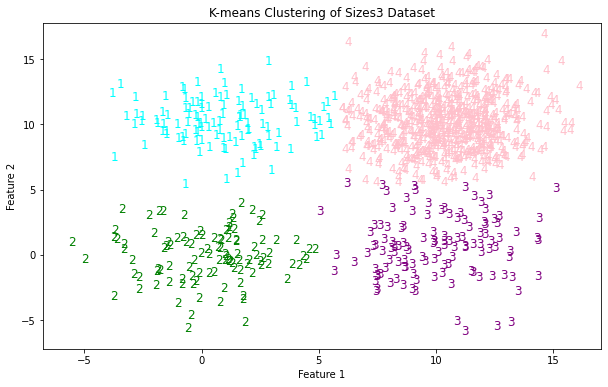

Clustering Elapsed Time: 2.84 s
SSE:  8341.253299448485
Accuracy:  0.98
Entropy:  0.15251344100496125


In [3]:
# 開始計時
start_time = time.time()


# K-means 群聚
kmeans_sizes3 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_sizes3_labels = kmeans_sizes3.fit_predict(df.drop('class', axis=1))

# 繪製散點圖
plt.figure(figsize=(10, 6))
colors = ['cyan', 'green', 'purple', 'pink']  # 每個群聚的顏色
for i in range(4):
    x = df.iloc[kmeans_sizes3_labels == i, 0].reset_index(drop=True)
    y = df.iloc[kmeans_sizes3_labels == i, 1].reset_index(drop=True)
    plt.scatter(x, y, c=colors[i], alpha=0.001)  # 添加一個輕微的散點圖作為背景
    for j in range(len(x)):
        plt.text(x[j], y[j], str(i+1), color=colors[i], fontsize=12)  # 在每個位置上添加數字
plt.title('K-means Clustering of Sizes3 Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 計算 SSE
sse = kmeans_sizes3.inertia_

# 計算熵
cluster_entropy = [scipy_entropy(df[kmeans_sizes3_labels == i]['class'].value_counts(normalize=True)) for i in range(kmeans_sizes3.n_clusters)]
mean_entropy = np.mean(cluster_entropy)

# 計算accuracy
def calculate_accuracy(true_labels, predicted_labels):
    D = max(predicted_labels.max(), true_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(predicted_labels.size):
        w[predicted_labels[i], true_labels[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in zip(*ind)]) / predicted_labels.size

accuracy = calculate_accuracy(df['class'], kmeans_sizes3_labels)

# 停止計時
end_time = time.time()
kmeans_elapsed_time = end_time - start_time

# 輸出結果
print("Clustering Elapsed Time: {:.2f} s".format(kmeans_elapsed_time))
print("SSE: ", sse)
print("Accuracy: ", accuracy)
print("Entropy: ", mean_entropy)